In [1]:
import sys
sys.path.append('../')
from low_rank_rnns.modules import *
import matplotlib
import matplotlib.pyplot as plt
from low_rank_rnns import dms, ranktwo, clustering, helpers
import seaborn as sns

In [2]:
matplotlib.rcParams['figure.figsize'] = (6, 5)
matplotlib.rcParams['font.size'] = 40
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.titlesize'] = 'medium'
matplotlib.rcParams['xtick.labelsize'] = 40
matplotlib.rcParams['ytick.labelsize'] = 40
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False

In [3]:
hidden_size = 4096
noise_std = 5e-2
alpha = 0.2
x_train, y_train, mask_train, x_val, y_val, mask_val = dms.generate_dms_data(1000)
net =  LowRankRNN(2, hidden_size, 1, noise_std, alpha, rank=2)
net.load_state_dict(torch.load(f'../models/dms_rank2_{hidden_size}.pt', map_location='cpu'))
net.svd_reparametrization()

In [4]:
loss_orig, acc_orig = dms.test_dms(net, x_val, y_val, mask_val)
print(acc_orig)
print(loss_orig)

1.0
0.0003793563228100538


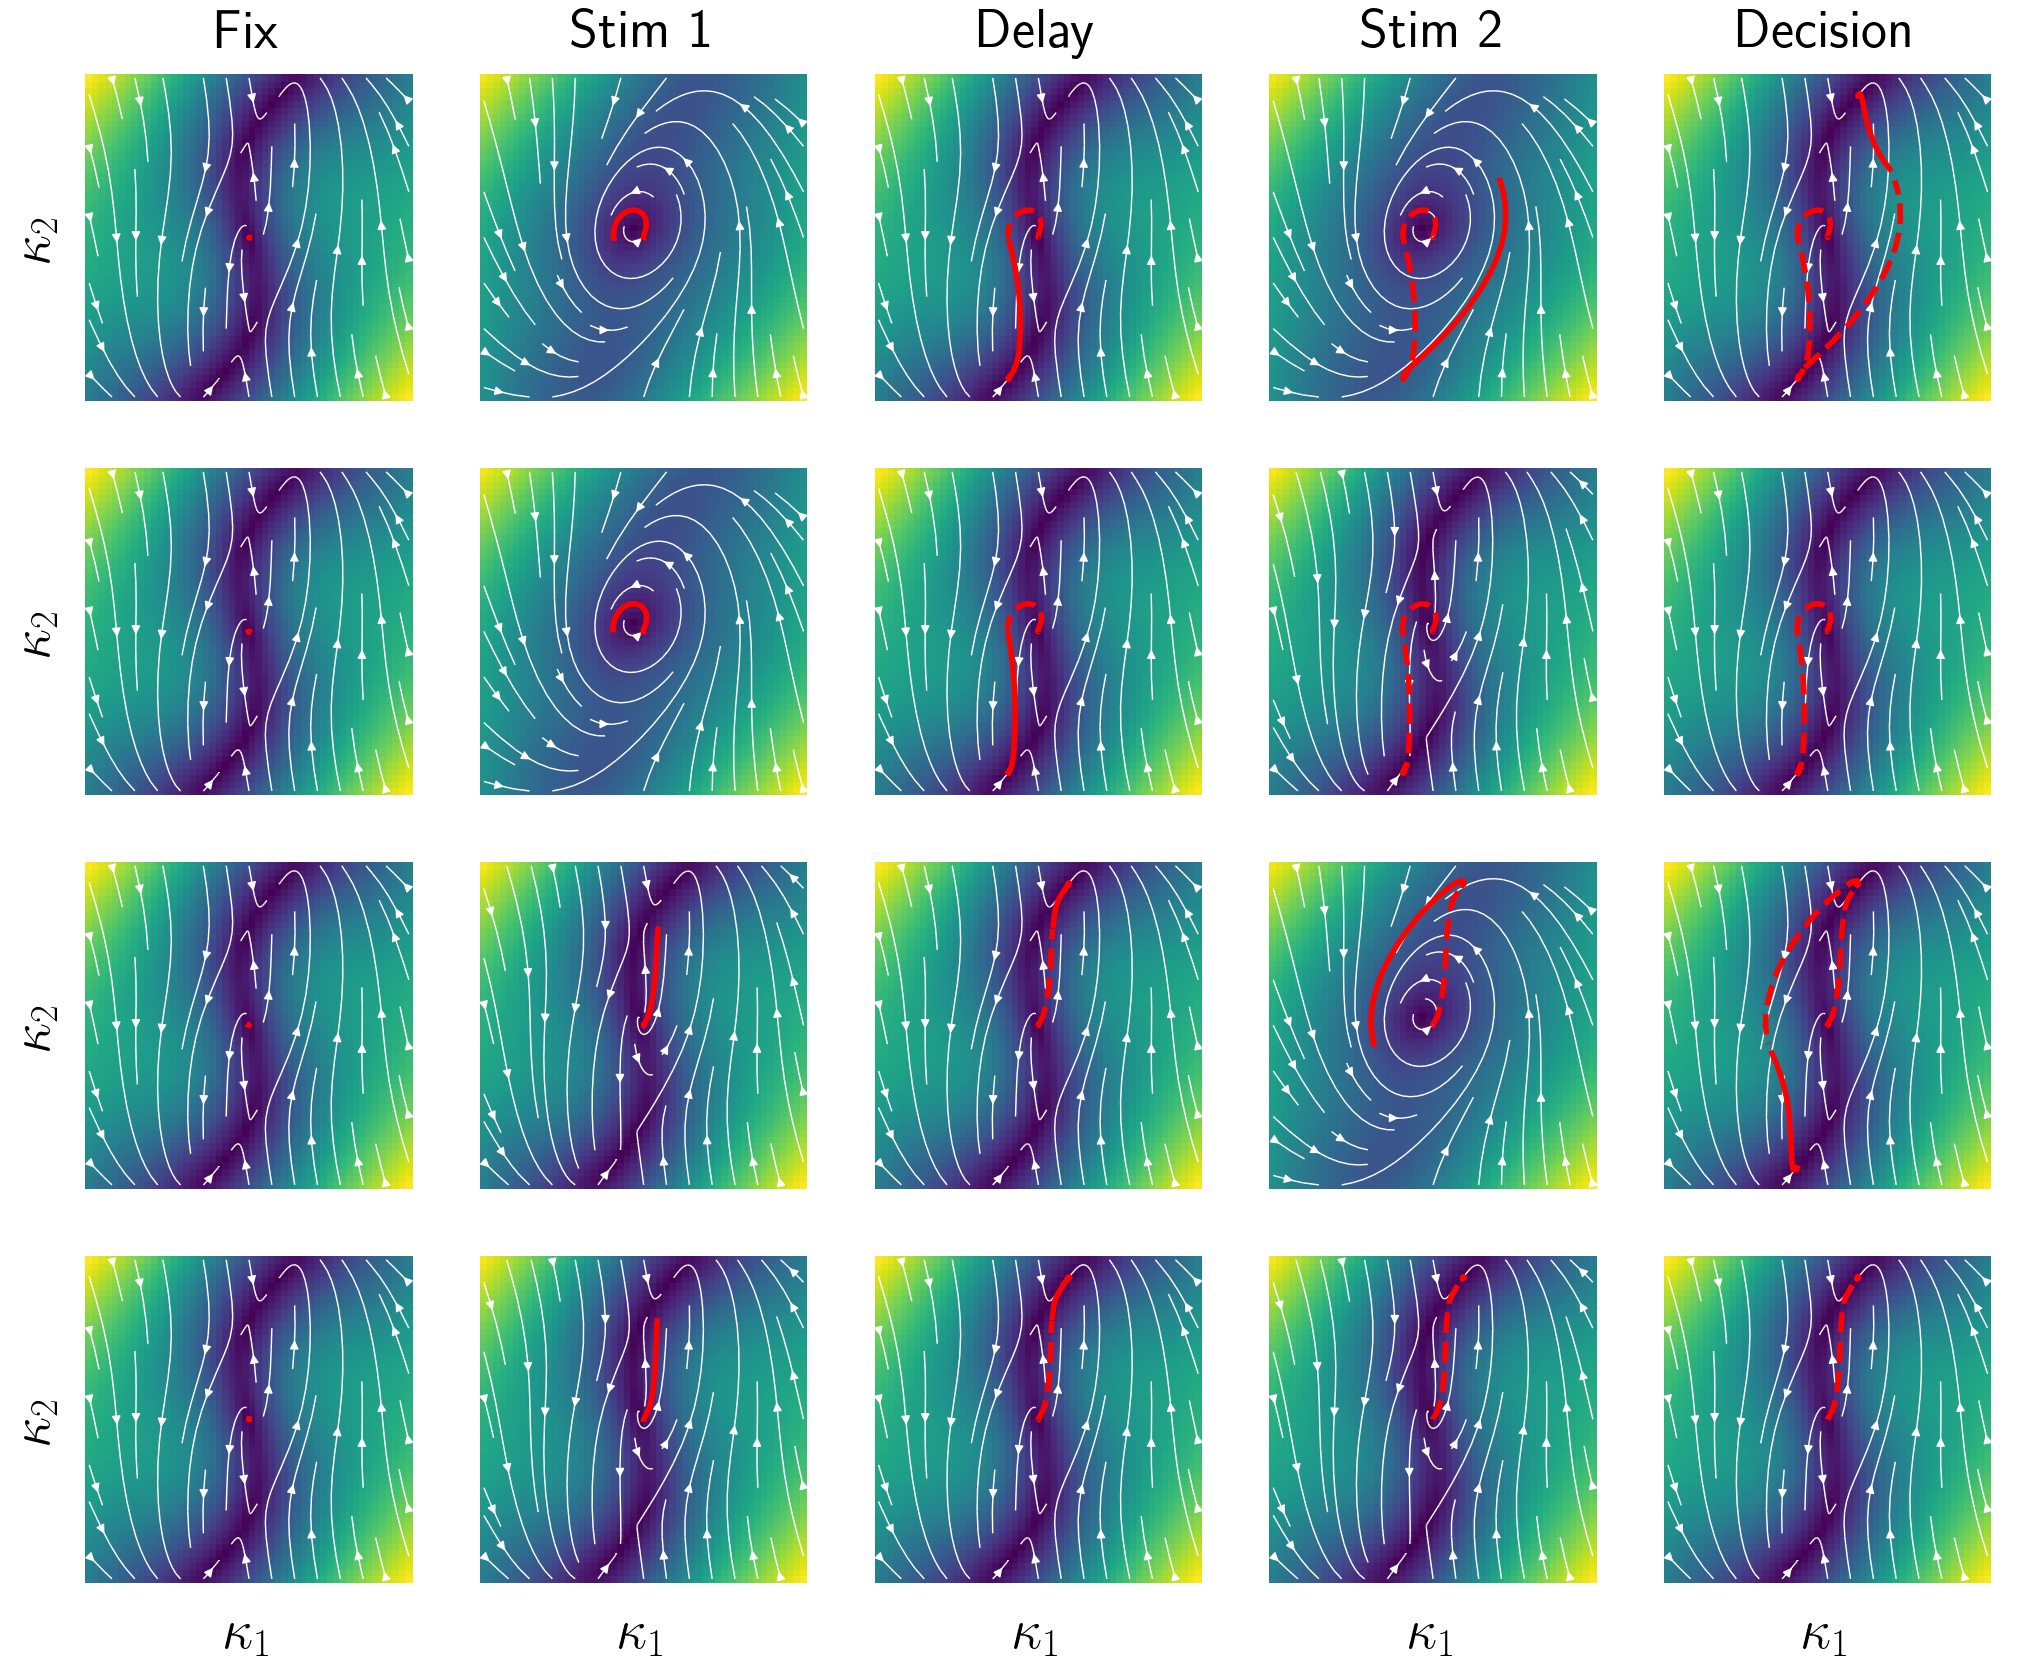

In [6]:
fig, ax = plt.subplots(4, 5, figsize=(25, 20))
dms.plot_trajectories_steps_ranktwo(net, scalings=False, rect=(-4, 4, -3, 3), ax=ax, sizes=1.3)

ax[0][0].set_title('Fix')
ax[0][1].set_title('Stim 1')
ax[0][2].set_title('Delay')
ax[0][3].set_title('Stim 2')
ax[0][4].set_title('Decision')

for i in range(4):
    ax[i][0].set_ylabel('$\kappa_2$')
for i in range(5):
    ax[3][i].set_xlabel('$\kappa_1$')
    
fig.subplots_adjust(hspace=.1, wspace=.1)
# plt.savefig('figures/si_dms_epochs.pdf')